# Data cleaning: parsing dates

This notebook is an abstraction of the Kaggle's 5-Day Challenge.

The **goal** of this exercise is to clean date entries. 

The **evaluation** of the assignment will follow:

* Design process and thinking as a data engineer.
* Validation of knowledge on the different tools and steps throughout the process.
* Storytelling and visualisation of the insights.

Exercise **workflow**:

* Import dependencies & download dataset from [here](https://www.kaggle.com/usgs/earthquake-database/download).
* Explore incoherent date formats.
* Parse dates
* Validate parsed dates
    
Notes:

* Write your code into the `TODO` cells.
* Feel free to choose how to present the results throughout the exercise, what libraries (e.g., seaborn, bokeh, etc.) and/or tools (e.g., PowerBI or Tableau).

## Preamble
________

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

np.random.seed(0)

## Data
________

* Download the earthquakes dataset from [here](https://www.kaggle.com/usgs/earthquake-database/download)

## Dates
________

**TODO**

* Check the data type of the `date` column
* Convert the `date` column to `datetime`
* Select just the `day of the month` from the parsed date column
* Plot the day of the month to validate the date parsing

In [86]:
e_dt = pd.read_csv("database.csv")

In [87]:
e_dt.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [88]:
print("Data type of date column is : ", e_dt.dtypes['Date'])

Data type of date column is :  object


In [89]:
print("Head of date column :- \n" , e_dt['Date'].head(5),"\n")
print("Tail of date column :- \n" , e_dt['Date'].tail(5))

Head of date column :- 
 0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object 

Tail of date column :- 
 23407    12/28/2016
23408    12/28/2016
23409    12/28/2016
23410    12/29/2016
23411    12/30/2016
Name: Date, dtype: object


##### Convert data type of date column

In [91]:
### Convert object datatype to datetime data type for date column

e_dt['Date_new'] = pd.to_datetime(e_dt['Date'],utc=True)
e_dt['Date_new'] =  pd.to_datetime(e_dt['Date_new'].dt.date)
e_dt['Date'] = e_dt['Date_new']
del e_dt['Date_new']
print("Head of date column :- \n" , e_dt['Date'].head(2),"\n")
print("Tail of date column  :- \n" , e_dt['Date'].tail(2))

Head of date column :- 
 0   1965-01-02
1   1965-01-04
Name: Date, dtype: datetime64[ns] 

Tail of date column  :- 
 23410   2016-12-29
23411   2016-12-30
Name: Date, dtype: datetime64[ns]


In [92]:
print("Data type of date column is : ", e_dt.dtypes['Date'])

Data type of date column is :  datetime64[ns]


##### Extract of Day from Date column

In [95]:
e_dt['Day'] = e_dt.Date.dt.day
e_dt['Day'].head(2) 

0    2
1    4
Name: Day, dtype: int64

##### Plot the day of the month

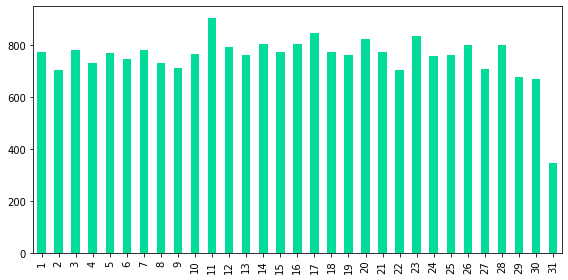

In [110]:
from matplotlib import pyplot as plt

#e_dt.Day.plot.hist(bins=31)
e_dt.Day.value_counts().sort_index().plot.bar(figsize=(8,4), color ="#02db9a")
